### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('./data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [2]:
# Convert the 'Date/Time' column to datetime format
df["Date/Time"]=pd.to_datetime(df["Date/Time"])
df["Date"]=df["Date/Time"].dt.date
df["Time"]=df["Date/Time"].dt.time
#print(df.head())
#print(df.info())

# Group by date and count the number of pickups
grps=df.groupby("Date").count()
#print(grps)

# Find the date with the highest number of pickups
most_pickups_date=grps.sort_values("Base",ascending=False).head(1).reset_index()["Date"][0]
print(most_pickups_date)



2014-08-07


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [4]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
df_most_pickups=df[df["Date"]==most_pickups_date]

# Get the count of pickups on the highest date
print(df_most_pickups["Base"].count())


32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [5]:
# Count the number of unique TLC base companies

len(df["Base"].unique())


5

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [12]:
# Group by TLC base company and count the number of pickups
grp_base=df.groupby("Base").count()

# Find the TLC base company with the highest number of pickups
print(grp_base.sort_values("Date",ascending=False).reset_index()["Base"].head(1)[0])

B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [14]:
# Group by TLC base company and count the number of pickups

print(grp_base["Date"])


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
Name: Date, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [21]:
# Extract the hour from the 'Date/Time' column
df["Hour"]=df["Date/Time"].dt.hour
#print(df["Hour"])

# Group by hour and count the number of pickups
grp_hour=df.groupby("Hour").count()
#print(grp_hour)

# Find the hour with the highest number of pickups
print(grp_hour.sort_values("Base",ascending=False).reset_index().head(1)["Hour"][0])


17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

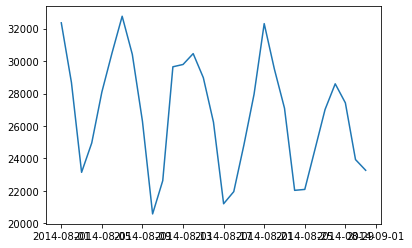

In [23]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
grp_date=df.groupby("Date").count()["Base"]
#print(grp_date)

# Create a line plot to visualize the number of pickups over time
plt.plot(grp_date)
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

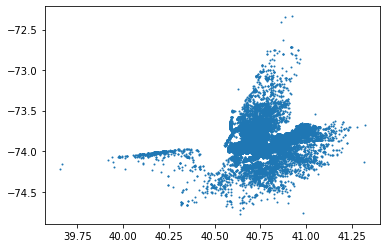

In [33]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
x=df["Lat"]
y=df["Lon"]

plt.scatter(x,y,s=1)
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

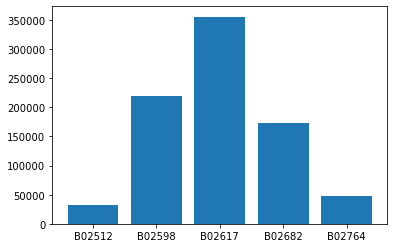

In [35]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
y=grp_base["Date"]
x=grp_base.index

plt.bar(x,y)
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

            Date/Time      Lat      Lon    Base        Date      Time  Hour  \
0 2014-08-01 00:03:00  40.7366 -73.9906  B02512  2014-08-01  00:03:00     0   
1 2014-08-01 00:09:00  40.7260 -73.9918  B02512  2014-08-01  00:09:00     0   
2 2014-08-01 00:12:00  40.7209 -74.0507  B02512  2014-08-01  00:12:00     0   
3 2014-08-01 00:12:00  40.7387 -73.9856  B02512  2014-08-01  00:12:00     0   
4 2014-08-01 00:12:00  40.7323 -74.0077  B02512  2014-08-01  00:12:00     0   

      Day  
0  Friday  
1  Friday  
2  Friday  
3  Friday  
4  Friday  


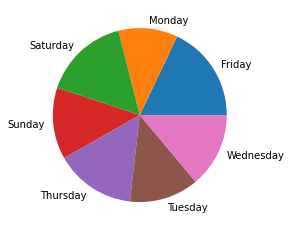

In [44]:
# Group by day of the week and count the number of pickups
df["Day"]=df["Date/Time"].dt.dayofweek
dict1={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
df["Day"]=df["Day"].map(dict1)
print(df.head())
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
grp_day=df.groupby("Day").count()
plt.pie(grp_day["Base"],labels=grp_day.index)
plt.show()